**Simon Aytes**

# Homework 21

The Federal Reserve Bank of New York has information about the labor market for recent college graduates [here](https://www.newyorkfed.org/research/college-labor-market/college-labor-market_compare-majors.html).

The data in this table can be downloaded as an Excel file at the bottom of the page. If you open this file in Excel, you can save the last table as a CSV file. 

Alternatively, download the data as a CSV file from [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/labor-market-Feb2021.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/labor-market-Feb2021.csv).

In [1]:
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

%matplotlib inline

### Question 1: Load and clean the data

This data file requires some cleaning.  Open the CSV file in Jupyter or another text editor to see what the possible problems are, and refer to Lab 4 for how to fix them. 

In [16]:
labor = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/labor-market-Feb2021.csv", skiprows=13)

In [27]:
# Drop all NA values
labor = labor.dropna(how = "any")

In [30]:
# Remove commas from two columns and cast them to integers
labor['Median Wage Early Career'].replace(',','', regex=True, inplace=True)
labor['Median Wage Mid-Career'].replace(',','', regex=True, inplace=True)
labor['Median Wage Early Career'] = labor['Median Wage Early Career'].astype(float)
labor['Median Wage Mid-Career'] = labor['Median Wage Mid-Career'].astype(float)

/var/folders/kh/mc7wqk790gq74xwfqmhncx080000gn/T/ipykernel_2308/2909110487.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labor['Median Wage Early Career'] = labor['Median Wage Early Career'].astype(float)
/var/folders/kh/mc7wqk790gq74xwfqmhncx080000gn/T/ipykernel_2308/2909110487.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labor['Median Wage Mid-Career'] = labor['Median Wage Mid-Career'].astype(float)


### Question 2: K-Means Clustering (unscaled)

a) Create a DataFrame x with the 5 quantitative columns (Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree).

In [31]:
x = labor[['Unemployment Rate', 'Underemployment Rate', 'Median Wage Early Career', 'Median Wage Mid-Career', 'Share with Graduate Degree']]

2b) Use the K-Means clustering algorithm to group the data into 4 groups.

In [33]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
clusters = kmeans.predict(x)

2c) Add a column containing the clusters predicted in 2b) to your cleaned DataFrame from the end of Question 1.

In [34]:
labor['clusters'] = clusters

### Question 3:  Assessing KMeans Clustering (unscaled)

a) Plot the scatterplots of all pairs of quantitative variables in the data, colored by the clusters.

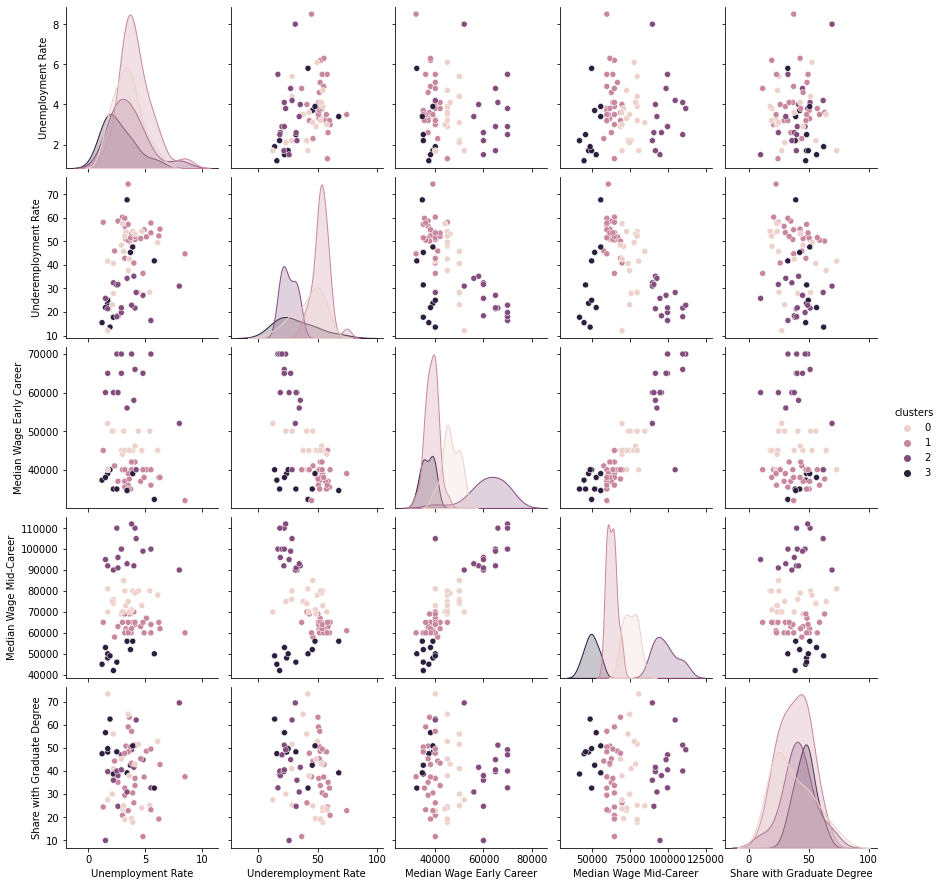

In [39]:
sns.pairplot(data=labor, hue="clusters")

3b) How well do you think the clustering worked?

**3b answer:** It looks like on some it clustered reasonably well, but I also don't know what majors were included in each cluster. For that reason I don't know if I can evaluate it properly at the moment.

3c) Look at your DataFrame to see which majors have been grouped into which cluster.  Do these groupings make sense?  Why or why not? 

In [42]:
group_0_majors = labor[labor['clusters'] == 0]['Major'].value_counts()
group_1_majors = labor[labor['clusters'] == 1]['Major'].value_counts()
group_2_majors = labor[labor['clusters'] == 2]['Major'].value_counts()
group_3_majors = labor[labor['clusters'] == 3]['Major'].value_counts()

In [43]:
group_0_majors

Architecture                        1
Nursing                             1
Miscellaneous Technologies          1
Engineering Technologies            1
International Affairs               1
Marketing                           1
Business Management                 1
Accounting                          1
General Business                    1
Political Science                   1
Communications                      1
Miscellaneous Physical Sciences     1
Earth Sciences                      1
Chemistry                           1
Mathematics                         1
Biochemistry                        1
Information Systems & Management    1
Advertising and Public Relations    1
Overall                             1
Name: Major, dtype: int64

In [44]:
group_1_majors

Agriculture                         1
Animal and Plant Sciences           1
Treatment Theraphy                  1
Medical Technicians                 1
Commercial Art & Graphic Design     1
Fine Arts                           1
Art History                         1
General Social Sciences             1
Sociology                           1
Geography                           1
Anthropology                        1
Public Policy and Law               1
Criminal Justice                    1
Psychology                          1
Philosophy                          1
Leisure and Hospitality             1
Nutrition Sciences                  1
Interdisciplinary Studies           1
Miscellaneous Biological Science    1
Biology                             1
Liberal Arts                        1
English Language                    1
Foreign Language                    1
Mass Media                          1
Journalism                          1
Ethnic Studies                      1
Environmenta

In [45]:
group_2_majors

Computer Science             1
General Engineering          1
Aerospace Engineering        1
Chemical Engineering         1
Civil Engineering            1
Computer Engineering         1
Electrical Engineering       1
Industrial Engineering       1
Mechanical Engineering       1
Miscellaneous Engineering    1
Physics                      1
Economics                    1
Construction Services        1
Pharmacy                     1
Business Analytics           1
Finance                      1
Name: Major, dtype: int64

In [46]:
group_3_majors

General Education               1
Early Childhood Education       1
Elementary Education            1
Secondary Education             1
Special Education               1
Miscellaneous Education         1
Family and Consumer Sciences    1
Theology and Religion           1
Social Services                 1
Performing Arts                 1
Health Services                 1
Name: Major, dtype: int64

**3c answer:** From a high-level, it looks like the groups are as follows:

0. Mathematical Sciences
1. Social Sciences
2. Physical Sciences
3. Liberal Arts

### Question 4: K-Means Clustering (scaled)

a) Create a DataFrame `x_scaled` with the 5 quantitative columns (Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree) scaled to be between 0 and 1.

In [47]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

4b) Use the K-Means clustering algorithm to group the scaled data into 4 groups.

In [48]:
kmeans_scaled = KMeans(n_clusters=4)
kmeans_scaled.fit(x_scaled)
clusters_scaled = kmeans_scaled.predict(x_scaled)

4c) Add a column with the assigned clusters from 4b to the cleaned DataFrame from the end of Qustion 1 (which may already contained the assigned clusters from Question 2c)

In [49]:
labor['clusters_scaled'] = clusters_scaled

### Question 5:  Assessing KMeans Clustering (scaled)

a) Plot the scatterplots of all pairs of quantitative variables in the cleaned DataFrame, colored by these clusters.

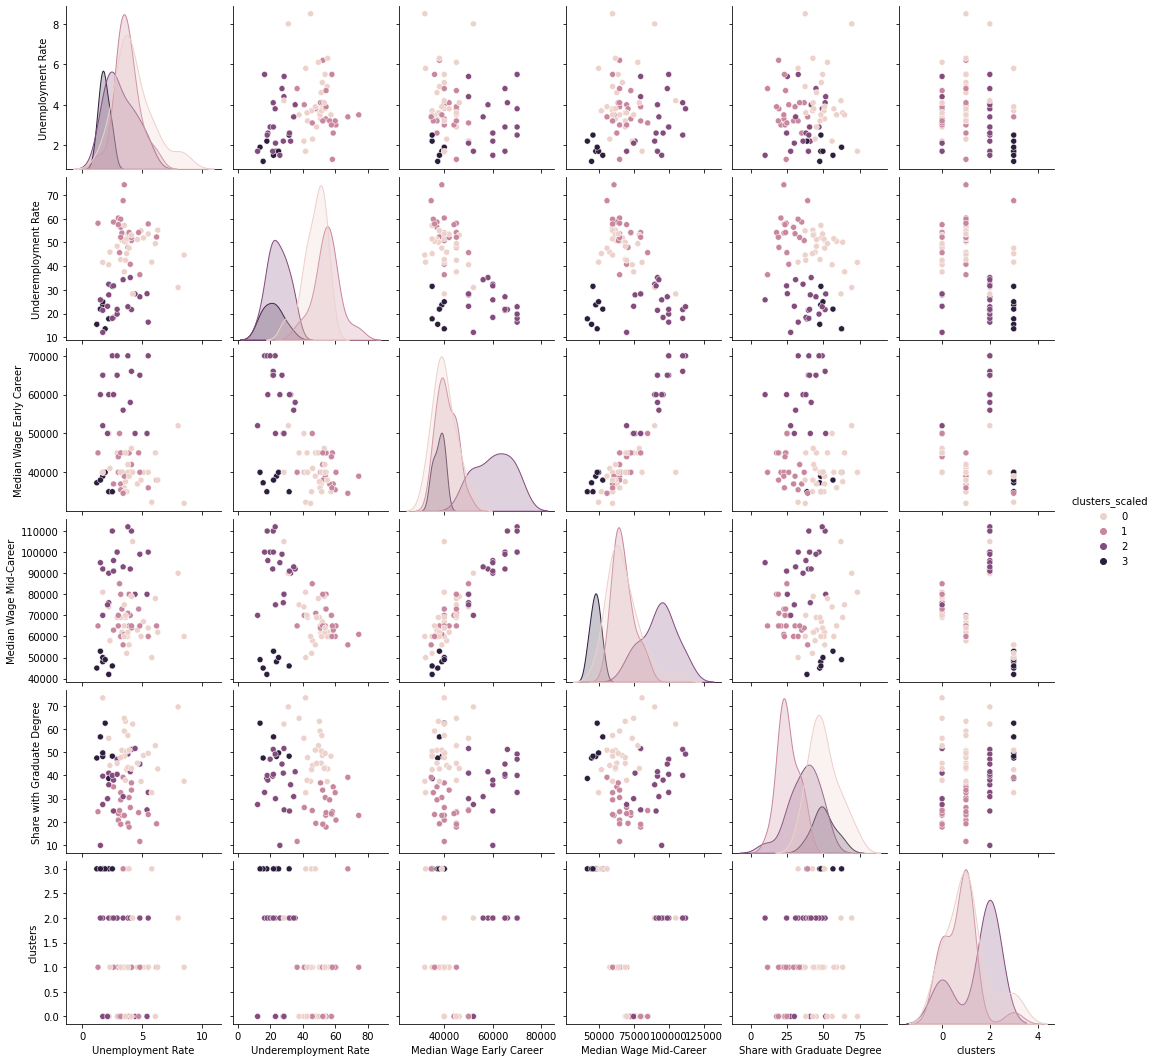

In [50]:
sns.pairplot(data=labor, hue = "clusters_scaled")

5b) How well do you think the clustering of scaled data worked?

**5b answer:** 

5c) Look at your DataFrame to see which majors have been grouped into which cluster of the scaled data. Do these groupings make sense? Why or why not?

In [51]:
group_0_majors_scaled = labor[labor['clusters_scaled'] == 0]['Major'].value_counts()
group_1_majors_scaled = labor[labor['clusters_scaled'] == 1]['Major'].value_counts()
group_2_majors_scaled = labor[labor['clusters_scaled'] == 2]['Major'].value_counts()
group_3_majors_scaled = labor[labor['clusters_scaled'] == 3]['Major'].value_counts()

In [53]:
group_0_majors_scaled

Ethnic Studies                      1
Psychology                          1
History                             1
International Affairs               1
Treatment Theraphy                  1
Pharmacy                            1
Health Services                     1
Art History                         1
General Social Sciences             1
Sociology                           1
Political Science                   1
Anthropology                        1
Public Policy and Law               1
Miscellaneous Physical Sciences     1
Foreign Language                    1
Physics                             1
Earth Sciences                      1
Chemistry                           1
Theology and Religion               1
Philosophy                          1
Nutrition Sciences                  1
Miscellaneous Biological Science    1
Biochemistry                        1
Biology                             1
English Language                    1
Family and Consumer Sciences        1
Overall     

In [54]:
group_1_majors_scaled

Agriculture                         1
Geography                           1
Engineering Technologies            1
Marketing                           1
Business Management                 1
General Business                    1
Medical Technicians                 1
Commercial Art & Graphic Design     1
Performing Arts                     1
Fine Arts                           1
Criminal Justice                    1
Animal and Plant Sciences           1
Leisure and Hospitality             1
Interdisciplinary Studies           1
Liberal Arts                        1
Advertising and Public Relations    1
Mass Media                          1
Journalism                          1
Communications                      1
Environmental Studies               1
Miscellaneous Technologies          1
Name: Major, dtype: int64

In [55]:
group_2_majors_scaled

Architecture                        1
Mechanical Engineering              1
Business Analytics                  1
Accounting                          1
Nursing                             1
Construction Services               1
Economics                           1
Mathematics                         1
Miscellaneous Engineering           1
Industrial Engineering              1
Information Systems & Management    1
Electrical Engineering              1
Computer Engineering                1
Civil Engineering                   1
Chemical Engineering                1
Aerospace Engineering               1
General Engineering                 1
Computer Science                    1
Finance                             1
Name: Major, dtype: int64

In [56]:
group_3_majors_scaled

General Education            1
Early Childhood Education    1
Elementary Education         1
Secondary Education          1
Special Education            1
Miscellaneous Education      1
Social Services              1
Name: Major, dtype: int64

**5c answer:** The scaled clusters look like the following:

0. Social Sciences and Liberal Arts
1. Social Sciences and Liberal Arts
2. Mathematical Sciences
3. Liberal Arts (Education)

5d) Which data gave better clusters: the scaled or unscaled data?  Why?

**5d answer:** I think the clustering of the unscaled data made more sense because the groupings were more logical. In the future I think an elbow curve could be useful to determine the optimal number of clusters though.